In [8]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pickle
import Jacks_Functions as JF
import Area_Avg as AA
from netCDF4 import Dataset
from ncdump_python3 import ncdump
%matplotlib inline
mpl.rc('font',size=22)
mpl.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
mpl.rc('text', usetex=True)
plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [2]:
RCP45_TimeSeries_Arctic = pickle.load(open(\
    'Perspectives_From_WAVD_Pickled/Surface Temperature/RCP45_ST_ArcticTimeSeries.pickle','rb'),encoding='latin1')
WAVD_TimeSeries_Arctic = pickle.load(open(\
    'Perspectives_From_WAVD_Pickled/Surface Temperature/WAVD_ST_ArcticTimeSeries.pickle','rb'),encoding='latin1')
RCP45_TimeSeries_Global = pickle.load(open(\
    'Perspectives_From_WAVD_Pickled/Surface Temperature/RCP45_ST_GlobalTimeSeries.pickle','rb'),encoding='latin1')
WAVD_TimeSeries_Global = pickle.load(open(\
    'Perspectives_From_WAVD_Pickled/Surface Temperature/WAVD_ST_GlobalTimeSeries.pickle','rb'),encoding='latin1')

In [3]:
#stack monthly values so we have two separate time dimensions, one for years, one for months
RCP45_TimeSeries_Arctic_stacked = np.zeros([5,60,12])
RCP45_TimeSeries_Global_stacked = np.zeros([5,60,12])
WAVD_TimeSeries_Arctic_stacked = np.zeros([5,60,12])
WAVD_TimeSeries_Global_stacked = np.zeros([5,60,12])

start = 0
finish = 12

for i in range(60):
    for j in range(5):
        RCP45_TimeSeries_Arctic_stacked[j,i,:] = np.stack(\
        RCP45_TimeSeries_Arctic[j,start:finish],axis=0)
        
        RCP45_TimeSeries_Global_stacked[j,i,:] = np.stack(\
        RCP45_TimeSeries_Global[j,start:finish],axis=0)
        
        WAVD_TimeSeries_Arctic_stacked[j,i,:] = np.stack(\
        WAVD_TimeSeries_Arctic[j,start:finish],axis=0)
        
        WAVD_TimeSeries_Global_stacked[j,i,:] = np.stack(\
        WAVD_TimeSeries_Global[j,start:finish],axis=0)
        
    start+=12
    finish+=12 
    
RCP45_Arctic_06_15AM = np.mean(RCP45_TimeSeries_Arctic_stacked[:,:10,:],axis=(1,2))
RCP45_Global_06_15AM = np.mean(RCP45_TimeSeries_Global_stacked[:,:10,:],axis=(1,2))
WAVD_Arctic_06_15AM = np.mean(WAVD_TimeSeries_Arctic_stacked[:,:10,:],axis=(1,2))
WAVD_Global_06_15AM = np.mean(WAVD_TimeSeries_Global_stacked[:,:10,:],axis=(1,2))

In [4]:
WAVD_TimeSeries_Arctic_Smoothed = np.zeros([5,709])
RCP45_TimeSeries_Arctic_Smoothed = np.zeros([5,709])
WAVD_TimeSeries_Global_Smoothed = np.zeros([5,709])
RCP45_TimeSeries_Global_Smoothed = np.zeros([5,709])

for i in range(5):
    RCP45_TimeSeries_Arctic_Smoothed[i,:] = JF.Moving_Avg(\
                                RCP45_TimeSeries_Arctic[i,:],window=12)
    
    WAVD_TimeSeries_Arctic_Smoothed[i,:] = JF.Moving_Avg(\
                                WAVD_TimeSeries_Arctic[i,:],window=12)
    
    RCP45_TimeSeries_Global_Smoothed[i,:] = JF.Moving_Avg(\
                                RCP45_TimeSeries_Global[i,:],window=12)
    
    WAVD_TimeSeries_Global_Smoothed[i,:] = JF.Moving_Avg(\
                                WAVD_TimeSeries_Global[i,:],window=12)

In [5]:
RCP45_Arctic_Anomaly = np.zeros([5,709])
WAVD_Arctic_Anomaly = np.zeros([5,709])
RCP45_Global_Anomaly = np.zeros([5,709])
WAVD_Global_Anomaly = np.zeros([5,709])

RCP45_Delta_TmSrs2Baseline_Global = np.zeros([5,709])
WAVD_Delta_TmSrs2Baseline_Global = np.zeros([5,709])
for i in range(5):
    RCP45_Arctic_Anomaly[i,:] = \
    RCP45_TimeSeries_Arctic_Smoothed[i,:]-RCP45_Arctic_06_15AM[i]
        
    WAVD_Arctic_Anomaly[i,:] = \
    WAVD_TimeSeries_Arctic_Smoothed[i,:]-WAVD_Arctic_06_15AM[i]
        
    RCP45_Global_Anomaly[i,:] = \
    RCP45_TimeSeries_Global_Smoothed[i,:]-RCP45_Global_06_15AM[i]
        
    WAVD_Global_Anomaly[i,:] = \
    WAVD_TimeSeries_Global_Smoothed[i,:]-WAVD_Global_06_15AM[i]

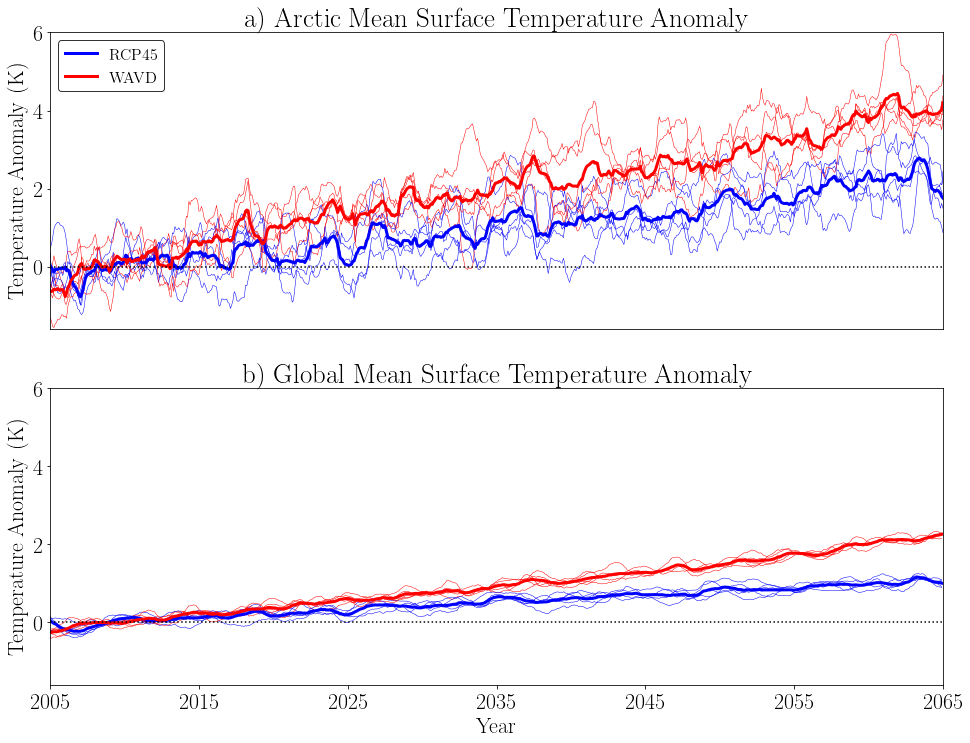

In [9]:
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
plt.title('a) Arctic Mean Surface Temperature Anomaly',fontsize=27)
for i in range(5):
    plt.plot(RCP45_Arctic_Anomaly[i,:], color = 'b', linewidth = 0.5)
    plt.plot(WAVD_Arctic_Anomaly[i,:], color = 'r', linewidth = 0.5)
plt.plot(np.mean(RCP45_Arctic_Anomaly,axis=0),color = 'b', linewidth = 3,label='RCP45')
plt.plot(np.mean(WAVD_Arctic_Anomaly,axis=0),color = 'r', linewidth = 3,label='WAVD')
plt.legend(fontsize=16,loc='upper left').get_frame().set_edgecolor('k')
plt.ylim(-1.6,6)
plt.ylabel('Temperature Anomaly (K)')
plt.axhline(0,color='k',linestyle=':')
#plt.yticks(np.arange(260,268,1))
plt.xticks([])

plt.subplot(2,1,2)
plt.title('b) Global Mean Surface Temperature Anomaly',fontsize=27)
for i in range(5):
    plt.plot(RCP45_Global_Anomaly[i,:], color = 'b', linewidth = 0.5)
    plt.plot(WAVD_Global_Anomaly[i,:], color = 'r', linewidth = 0.5)
plt.plot(np.mean(RCP45_Global_Anomaly,axis=0),color = 'b', linewidth = 3,label='RCP45')
plt.plot(np.mean(WAVD_Global_Anomaly,axis=0),color = 'r', linewidth = 3,label='WAVD')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (K)')
plt.ylim(-1.6,6)
plt.axhline(0,color='k',linestyle=':')
labels = ['2005','2015','2025','2035','2045','2055','2065']
plt.xticks(np.arange(0, 710, step=118.16), labels);

#plt.savefig('Ts_Time_Anomaly.eps',bbox_inches='tight')

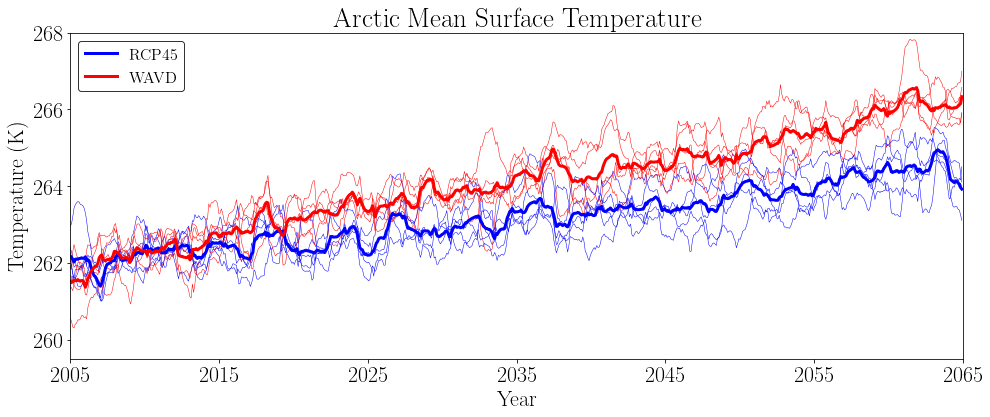

In [10]:
plt.figure(figsize=(16,6))

plt.title('Arctic Mean Surface Temperature',fontsize=27)
for i in range(5):
    plt.plot(RCP45_TimeSeries_Arctic_Smoothed[i,:], color = 'b', linewidth = 0.5)
    plt.plot(WAVD_TimeSeries_Arctic_Smoothed[i,:], color = 'r', linewidth = 0.5)
plt.plot(np.mean(RCP45_TimeSeries_Arctic_Smoothed,axis=0),color = 'b', linewidth = 3,label='RCP45')
plt.plot(np.mean(WAVD_TimeSeries_Arctic_Smoothed,axis=0),color = 'r', linewidth = 3,label='WAVD')
plt.legend(fontsize=16,loc='upper left').get_frame().set_edgecolor('k')
plt.ylim(259.5,268)
plt.ylabel('Temperature (K)')
labels = ['2005','2015','2025','2035','2045','2055','2065']
plt.xticks(np.arange(0, 710, step=118.16), labels)
plt.xlabel('Year');

#plt.savefig('Ts_Time_Arctic.eps',bbox_inches='tight')